In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

In [13]:
from ironhide.utilities.helpers import accuracy
from ironhide.data.mnist import num_pixels, train_images, train_labels, test_images, test_labels
from ironhide.models.mlp import ToyMLP

In [14]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [15]:
layer_sizes = [784, 512, 512, 10]

In [16]:
tmlp = ToyMLP(None, layer_sizes)

### Without Training

In [17]:
tmlp.predict(test_images)

Array([5, 8, 0, ..., 4, 8, 8], dtype=int32)

In [18]:
accuracy(tmlp.predict(test_images), test_labels)

Array(0.12469999, dtype=float32)

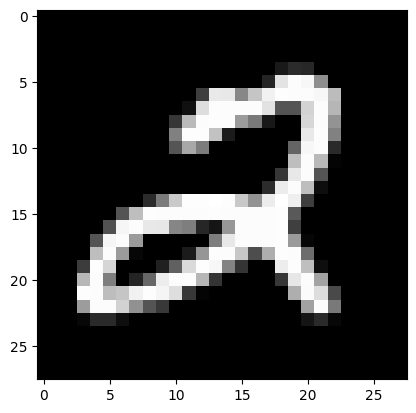

In [22]:
first_image = test_images[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
flattened = pixels.reshape(1, 784)
plt.imshow(pixels, cmap='gray')
plt.show()

In [23]:
tmlp.predict(flattened)

Array([5], dtype=int32)

### Fit with implemented GD without `jaxopt`

In [24]:
tmlp.fit(train_images, train_labels, use_jaxopt=False)

In [25]:
accuracy(tmlp.predict(test_images), test_labels)

Array(0.97959995, dtype=float32)

In [26]:
tmlp.predict(flattened)

Array([2], dtype=int32)

### Fit with `jaxopt`

In [27]:
tmlp = ToyMLP(None, layer_sizes)

In [28]:
tmlp.fit(train_images, train_labels, use_jaxopt=True)

In [29]:
accuracy(tmlp.predict(test_images), test_labels)

Array(0.98109996, dtype=float32)

In [30]:
tmlp.predict(flattened)

Array([2], dtype=int32)